<a href="https://colab.research.google.com/github/maropartz23/AMSE/blob/main/Wine-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wine Chemical Analysis for Quality Control - Martin ROPARTZ**

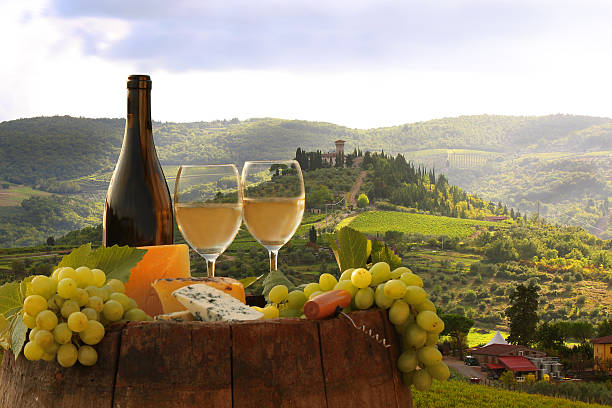

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

import scipy.cluster.hierarchy as sch

from google.colab import files

In [1]:
#read the dataset

from google.colab import drive

drive.mount('/content/drive')

path = '/content/drive/MyDrive/wine-clustering.csv'
df = pd.read_csv(path)
df.head()

Mounted at /content/drive


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# [TASK 1](https://)

# General information about the dataset:

In [4]:
print("1) Shape (rows, columns):", df.shape, "\n")

print("2) Data types and non-null counts:")
display(df.info())

print("\n3) Missing values per column:")
print(df.isna().sum())

print("\n4) Number of duplicated rows:", df.duplicated().sum(), "\n")

print("5) Descriptive statistics (including 1%, 5%, 95%, 99% percentiles):")
display(df.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99]).T)

#quick min max overview for comparaison if we need that for later
print("\n6) Min / Max per column:")
print(df.agg(["min","max"]).T)

1) Shape (rows, columns): (178, 13) 

2) Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


None


3) Missing values per column:
Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

4) Number of duplicated rows: 0 

5) Descriptive statistics (including 1%, 5%, 95%, 99% percentiles):


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Alcohol,178.0,13.000618,0.811827,11.03,11.4408,11.6585,12.3625,13.050,13.6775,14.2215,14.4728,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,0.8977,1.0610,1.6025,1.865,3.0825,4.4555,5.5422,5.80
Ash,178.0,2.366517,0.274344,1.36,1.7000,1.9200,2.2100,2.360,2.5575,2.7415,2.9890,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,11.3540,14.7700,17.2000,19.500,21.5000,25.0000,28.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,78.0000,80.8500,88.0000,98.000,107.0000,124.3000,141.7600,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.1385,1.3800,1.7425,2.355,2.8000,3.2745,3.5959,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,0.4700,0.5455,1.2050,2.135,2.8750,3.4975,3.7914,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.1400,0.1900,0.2700,0.340,0.4375,0.6000,0.6300,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,0.4200,0.7300,1.2500,1.555,1.9500,2.7090,3.0336,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,1.8632,2.1140,3.2200,4.690,6.2000,9.5980,11.0185,13.00



6) Min / Max per column:
                         min      max
Alcohol                11.03    14.83
Malic_Acid              0.74     5.80
Ash                     1.36     3.23
Ash_Alcanity           10.60    30.00
Magnesium              70.00   162.00
Total_Phenols           0.98     3.88
Flavanoids              0.34     5.08
Nonflavanoid_Phenols    0.13     0.66
Proanthocyanins         0.41     3.58
Color_Intensity         1.28    13.00
Hue                     0.48     1.71
OD280                   1.27     4.00
Proline               278.00  1680.00


# Visualizing distributions:

Numeric columns detected: ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']


<Figure size 1500x1200 with 0 Axes>

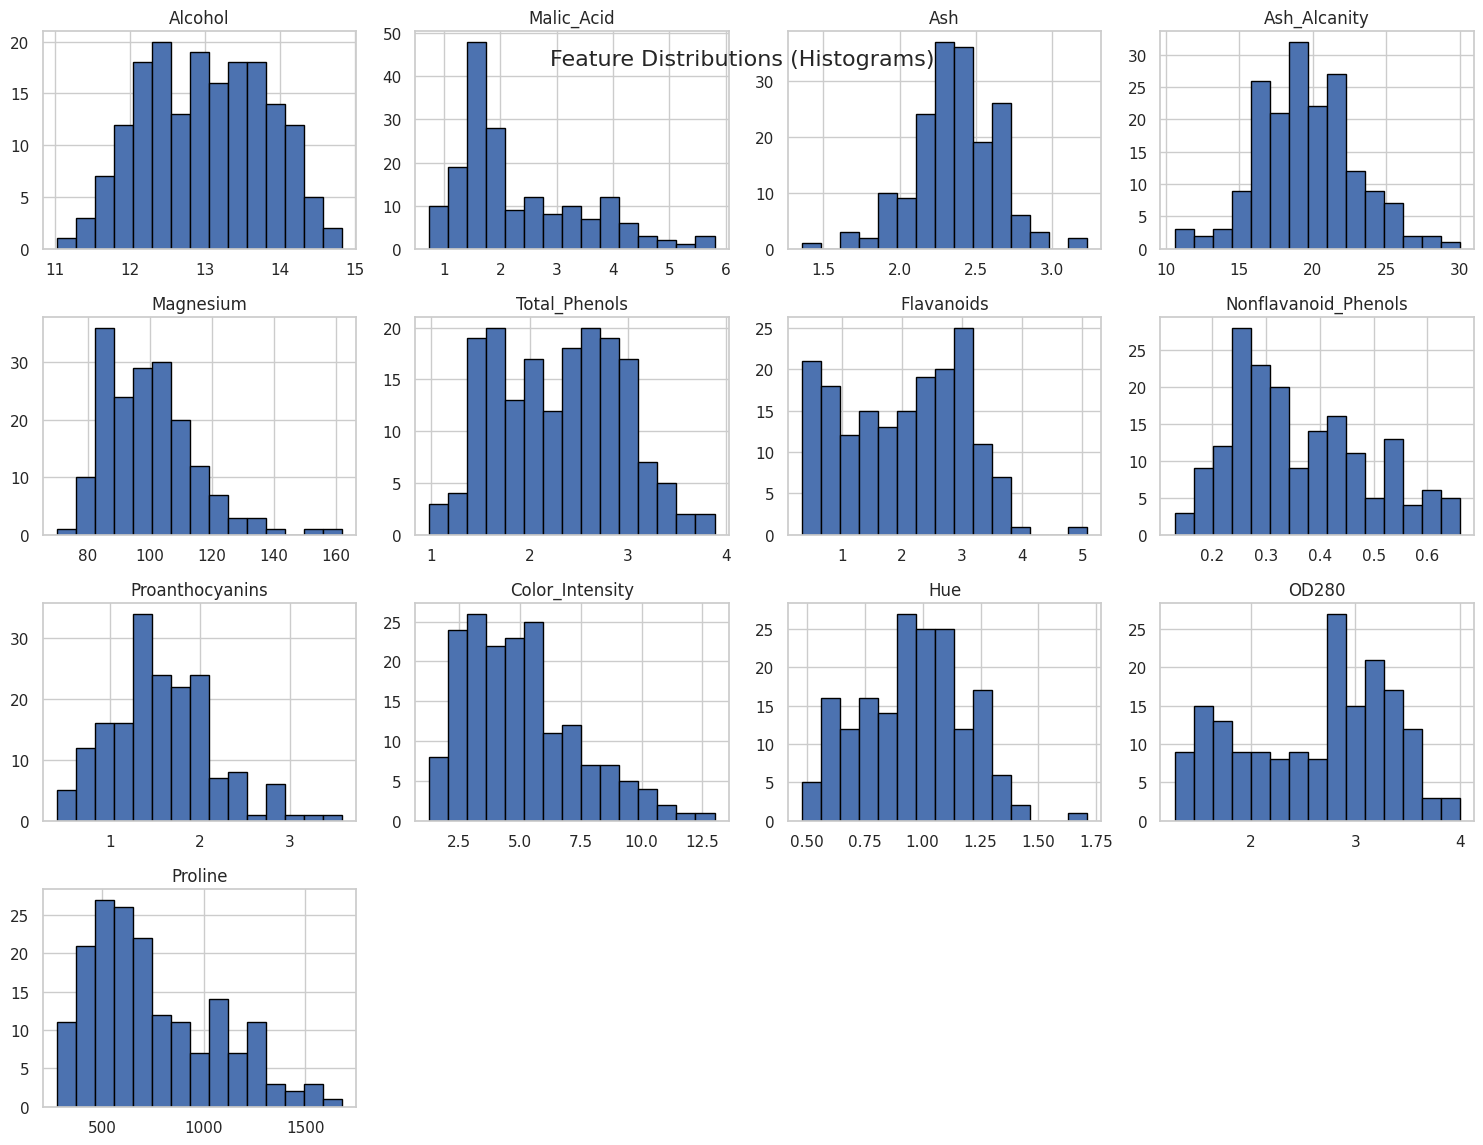

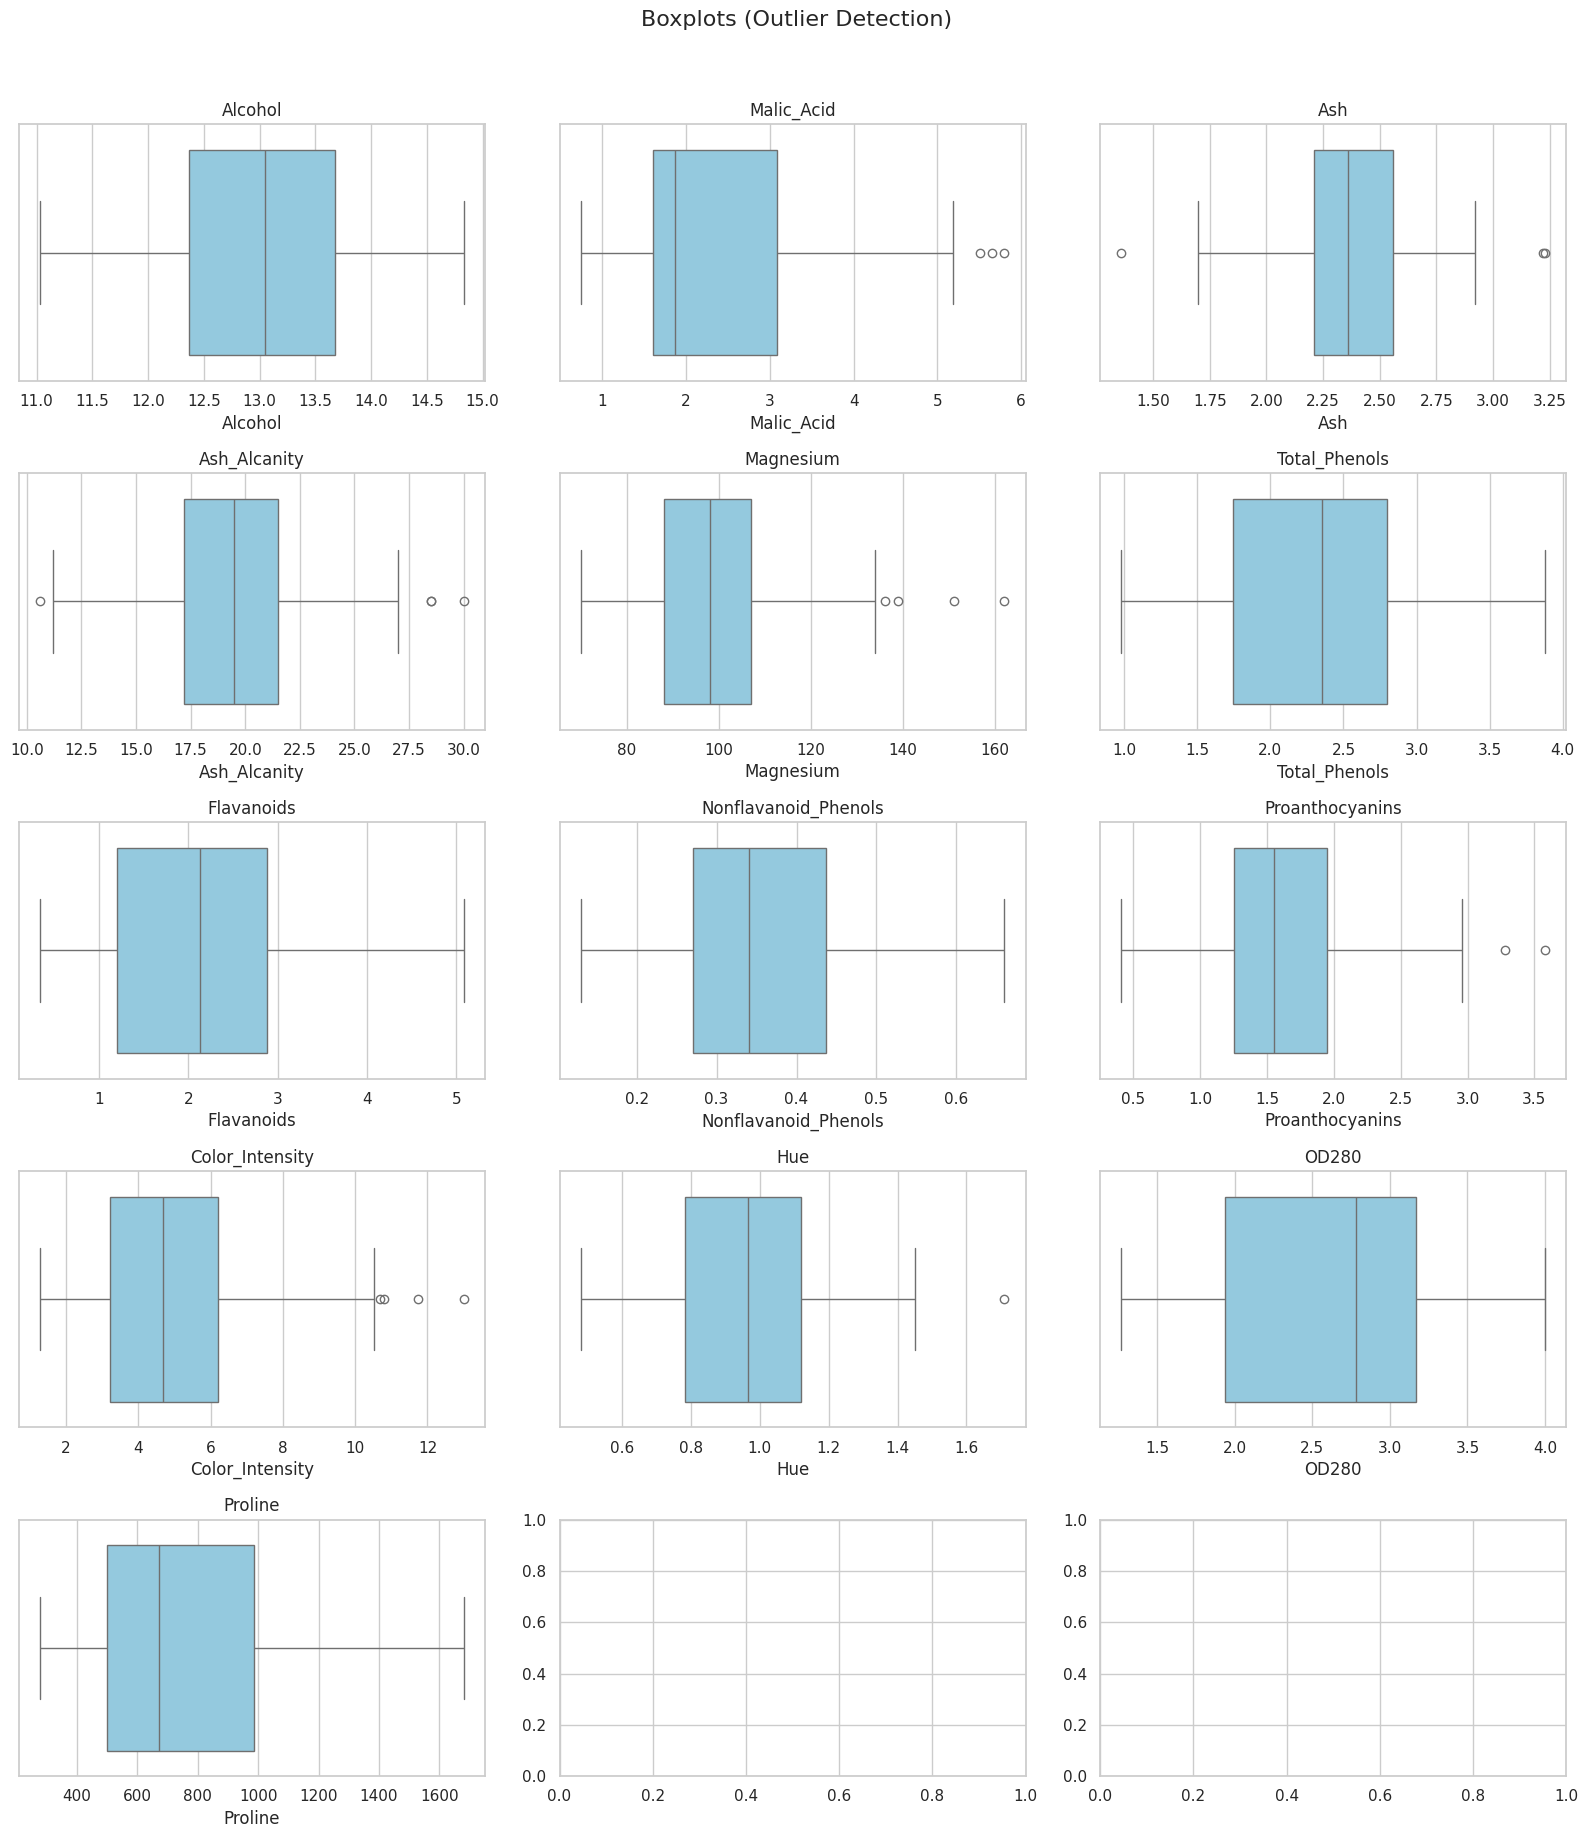

In [5]:
sns.set(style="whitegrid")

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns detected:", num_cols)

# HISTOGRAMS
plt.figure(figsize=(15, 12))
df[num_cols].hist(bins=15, figsize=(15, 12), edgecolor='black')
plt.suptitle("Feature Distributions (Histograms)", fontsize=16, y=0.92)
plt.tight_layout()
plt.show()

# BOXPLOTS
fig, axes = plt.subplots(nrows=len(num_cols)//3 + 1, ncols=3, figsize=(16, 18))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(col)

plt.suptitle("Boxplots (Outlier Detection)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


The histograms show diverse distributions among the wine chemical features.
Most variables (such as Alcohol, Ash, and Flavanoids) follow an approximately normal distribution, suggesting stable chemical characteristics across samples.
However, several features (notably Malic_Acid, Magnesium, Color_Intensity, and Proline) display right-skewed distributions, indicating that a few wines have significantly higher concentrations for these compounds.

Boxplots reveal potential outliers mainly in Malic_Acid, Ash_Alcanity, Magnesium, Color_Intensity, and Proline.
These outliers are not necessarily errors — they may correspond to distinct cultivars or chemical profiles.
Overall, the dataset shows rich variability, which will be valuable for clustering analysis.

# Correlation analysis

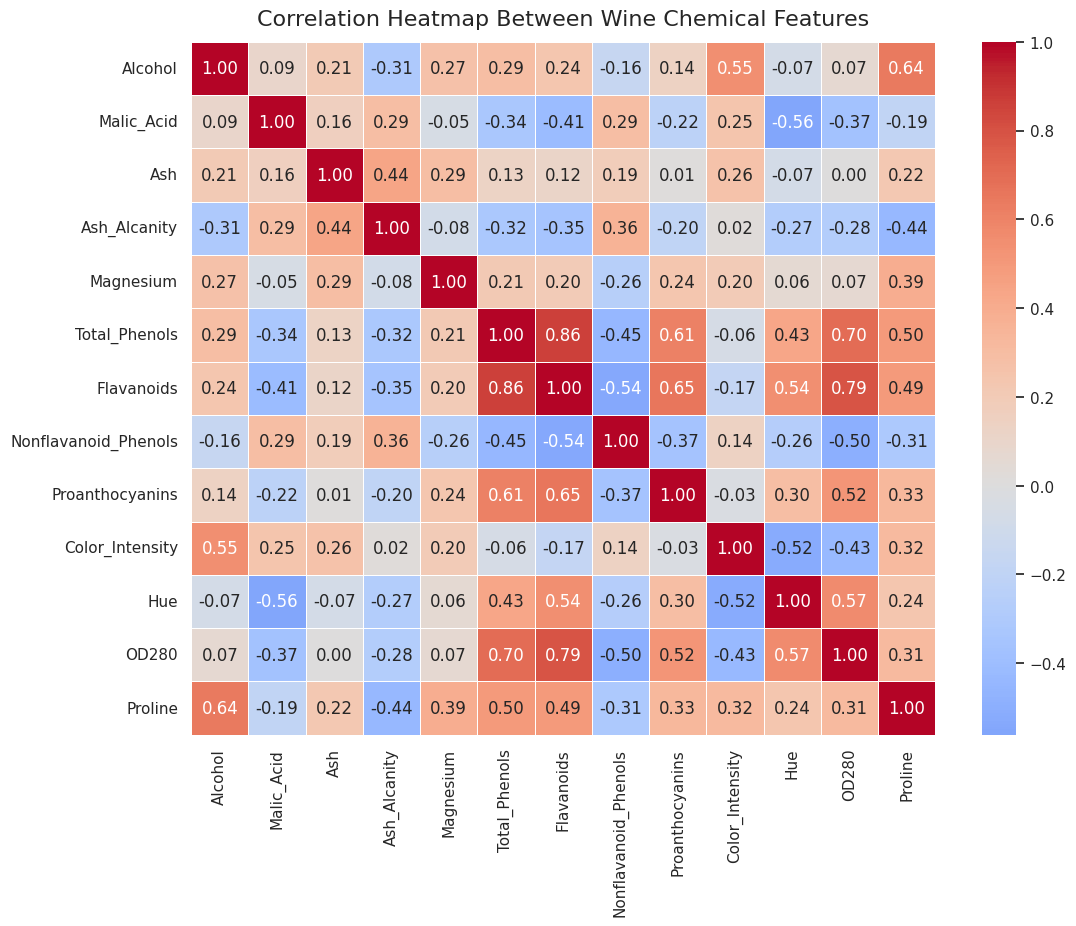

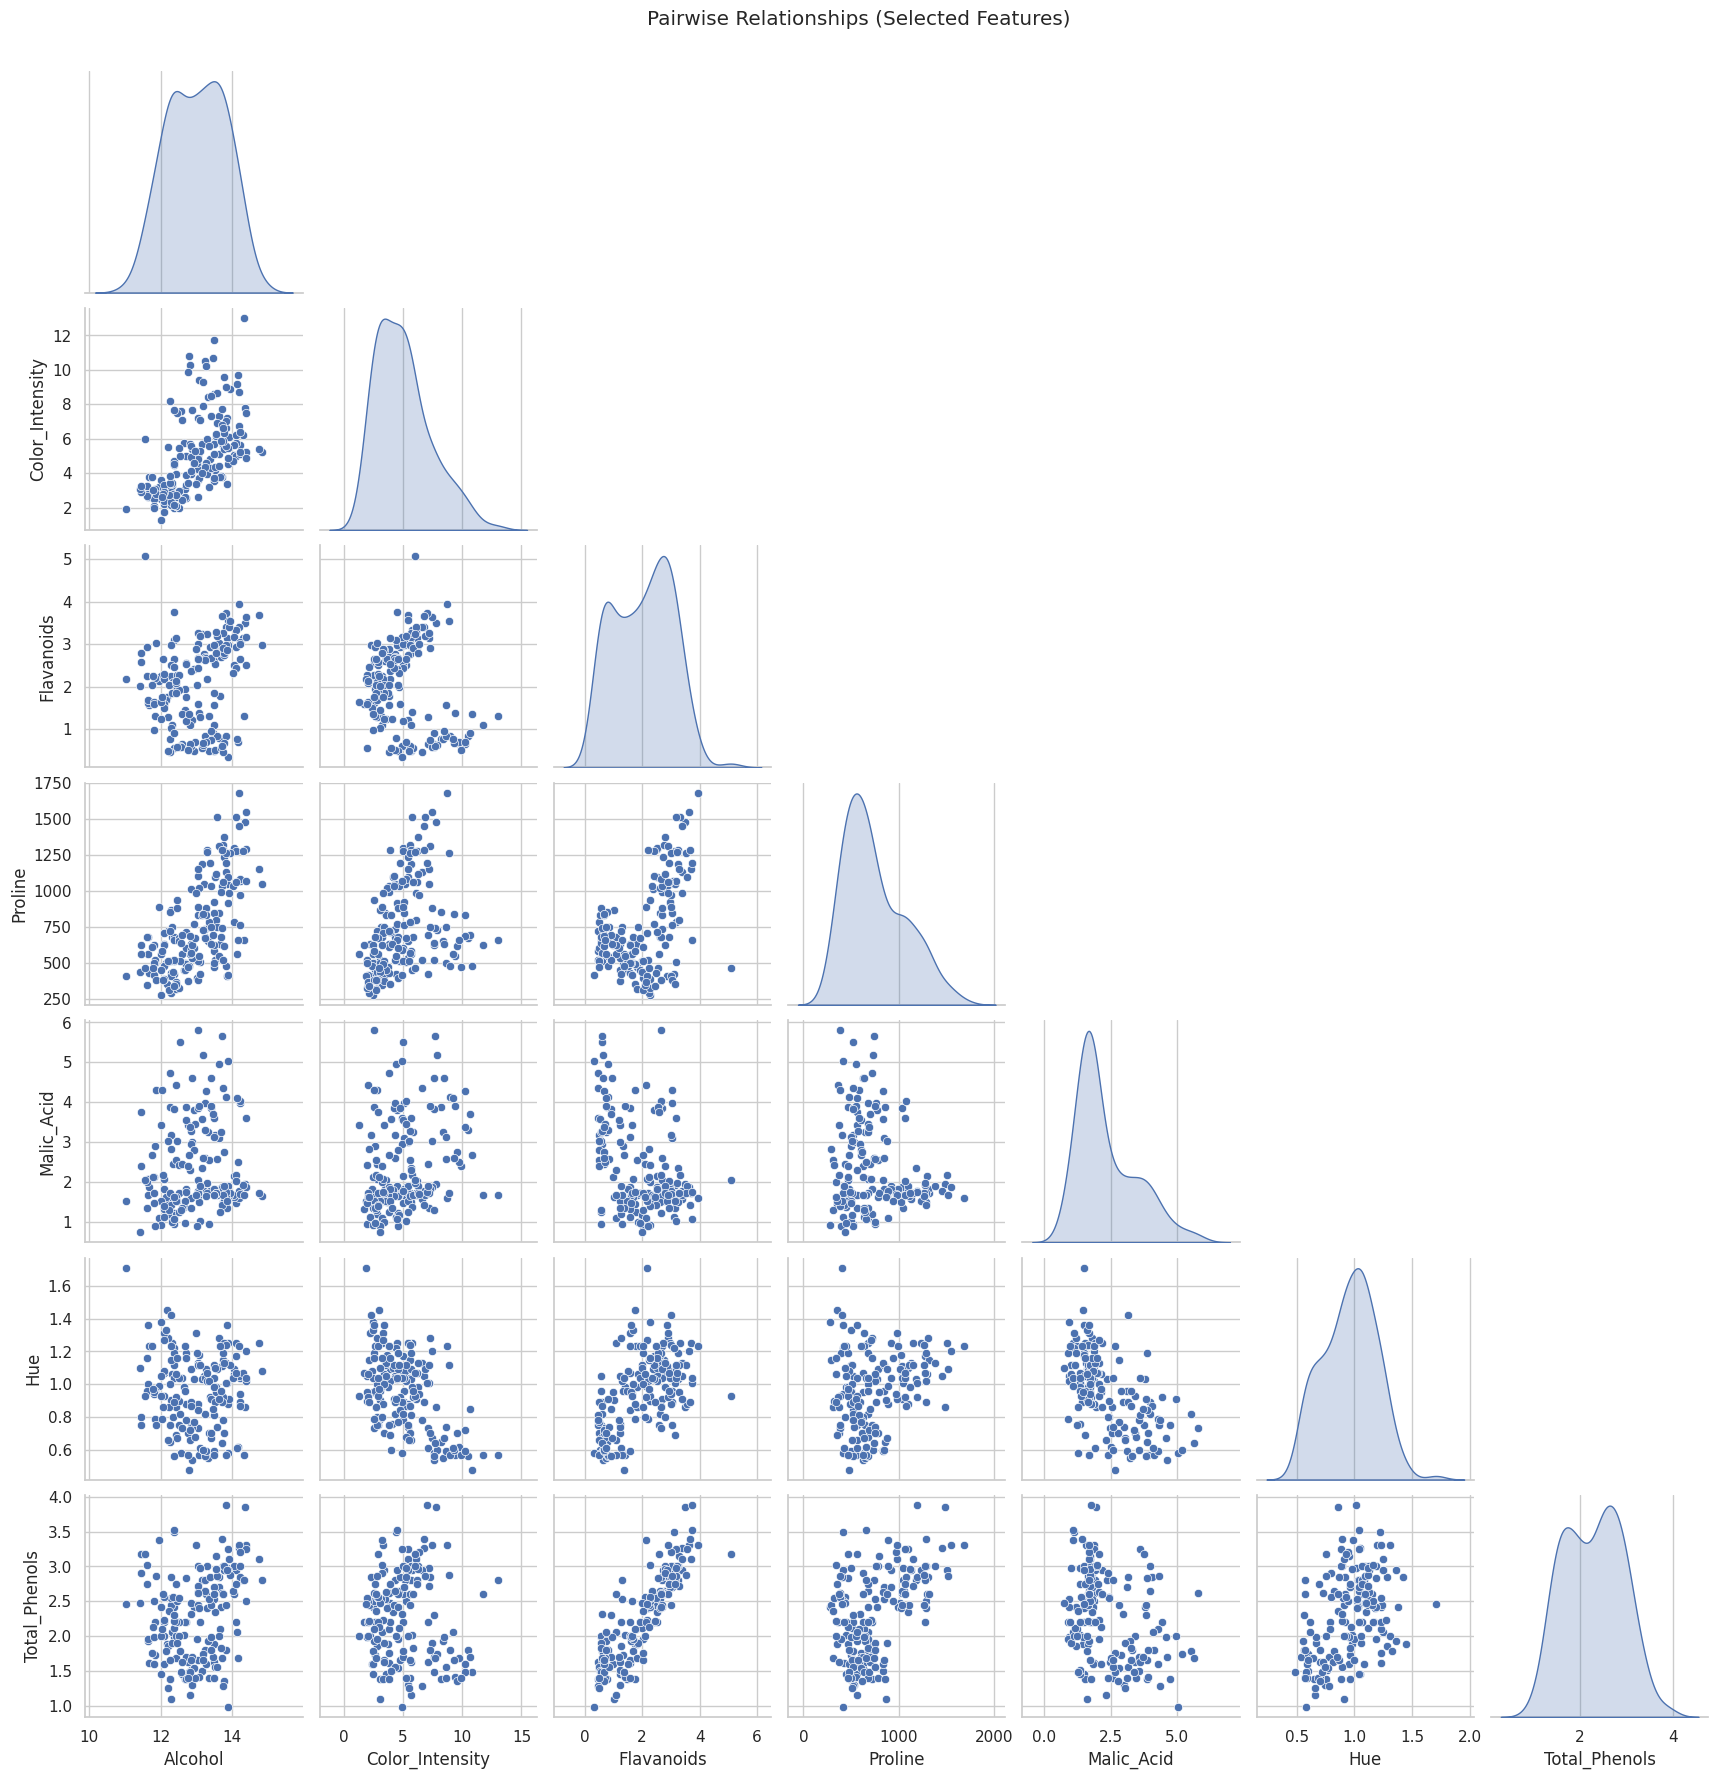

In [7]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap Between Wine Chemical Features", fontsize=16, pad=12)
plt.show()


The correlation heatmap reveals several strong relationships among the chemical features:

Total Phenols, Flavanoids, and OD280 are highly correlated (r > 0.75), indicating they describe similar chemical characteristics — mainly the polyphenolic content of the wine.

Alcohol shows a strong positive correlation with Proline (r = 0.64) and Color Intensity (r = 0.55), suggesting that more alcoholic wines tend to be richer in amino acids and display deeper color tones.

Malic Acid correlates negatively with Flavanoids and OD280, meaning acidic wines generally have lower polyphenolic content.

Nonflavanoid Phenols are inversely related to Flavanoids, which is chemically consistent.

These patterns suggest two main underlying chemical profiles:

A phenolic richness / color intensity dimension,

An acidity / maturity dimension.

# Preprocessing for K-Means

In [8]:
from sklearn.preprocessing import StandardScaler

X = df.copy()  # on garde l'original intact

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Scaled data preview:")
display(X_scaled.head())

print("\nMeans after scaling:\n", X_scaled.mean().round(2))
print("\nStandard deviations after scaling\n", X_scaled.std().round(2))

Scaled data preview:


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874



Means after scaling:
 Alcohol                -0.0
Malic_Acid             -0.0
Ash                    -0.0
Ash_Alcanity           -0.0
Magnesium              -0.0
Total_Phenols           0.0
Flavanoids             -0.0
Nonflavanoid_Phenols    0.0
Proanthocyanins        -0.0
Color_Intensity         0.0
Hue                     0.0
OD280                   0.0
Proline                -0.0
dtype: float64

Standard deviations after scaling
 Alcohol                 1.0
Malic_Acid              1.0
Ash                     1.0
Ash_Alcanity            1.0
Magnesium               1.0
Total_Phenols           1.0
Flavanoids              1.0
Nonflavanoid_Phenols    1.0
Proanthocyanins         1.0
Color_Intensity         1.0
Hue                     1.0
OD280                   1.0
Proline                 1.0
dtype: float64
